# Supervised Tracking of Fiducial Markers in Magnetic Tweezer Measurements

In [1]:
import os
from urllib.request import urlretrieve

# load the database from the example repository and the first image as an example
urls = ["https://bitbucket.org/fabry_biophysics/clickpointsexamples/raw/tip/TweezerVideos/001/track.cdb", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/TweezerVideos/001/frame0000.jpg"]
for url in urls:
    file = os.path.basename(url)
    if not os.path.exists(file):
        print("Downloading File", file)
        urlretrieve(url, file)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# connect to ClickPoints database
# database filename is supplied as command line argument when started from ClickPoints
import clickpoints
db = clickpoints.DataFile("track.cdb")

path track.cdb
Open database with version 18


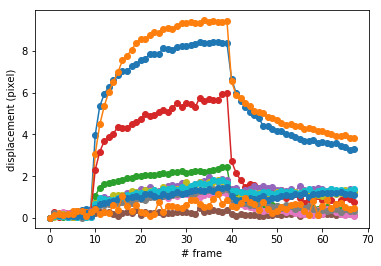

In [3]:
# get all tracks
tracks = db.getTracks()

# iterate over all tracks
for track in tracks:
    # get the points
    points = track.points
    # calculate the distance to the first point
    distance = np.linalg.norm(points[:, :] - points[0, :], axis=1)
    # plot the displacement
    plt.plot(track.frames, distance, "-o")

# label the axes
plt.xlabel("# frame")
plt.ylabel("displacement (pixel)")

(400, 200)

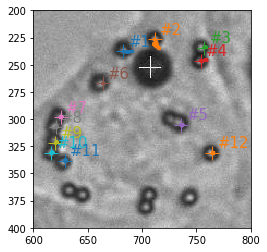

In [4]:
# get the first image
im_entry = db.getImage(0)

# we load the pixel data from the Image database entry
im_pixel = im_entry.data

# plot the image
plt.imshow(im_pixel, cmap="gray")

# iterate over all tracks
for track in tracks:
    # get the points
    points = track.points
    # plot the beginning of the track
    cross, = plt.plot(points[0, 0], points[0, 1], '+', ms=14, mew=1)
    # plot the track with the same color
    plt.plot(points[:, 0], points[:, 1], lw=3, color=cross.get_color())
    # plot the track id with a little offset and the same color
    plt.text(points[0, 0]+5, points[0, 1]-5, "#%d" % track.id, color=cross.get_color(), fontsize=15)

# zoom into the image
plt.xlim(600, 800)
plt.ylim(400, 200)